# Model 2

This second model uses one thousand trajectories, hence there are one thousand $x_s$ and $\tau$ matrices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib widget
plt.style.use('seaborn-v0_8')

2023-05-27 06:08:02.095039: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 06:08:02.513713: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 06:08:02.518859: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 06:08:05.044475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Creating the model
- $x_s$ is a $12\times25001$ matrix.
- $\tau$ is a $4\times25001$ matrix.
- Both were generated from Sanches' script and their trajectory are **circular**

In [2]:
# Looping to get all the 1000 matrices into one single variable
xs = []
for i in range(500):
    xs.append(
        pd.read_csv(f'xs_{i+1}.csv', header=None, engine='c').T.rename(columns={
            0: 'x.',
            1: 'y.',
            2: 'z.',
            3: 'phi.',
            4: 'theta.',
            5: 'psi.',
            6: 'x',
            7: 'y',
            8: 'z',
            9: 'phi',
            10: 'theta',
            11: 'psi',
        })
    )

tau = []
for i in range(500):
    tau.append(pd.read_csv(f'tau_{i+1}.csv', header=None, engine='c').T)

KeyboardInterrupt: 

In [6]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(xs, tau, test_size=0.2)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [5]:
# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='linear'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4)
])

# Compiling the model
model_2.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Fitting the model
history_2 = model_2.fit(np.stack(X_train),np.stack(y_train), epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 472ms/step - loss: 111.8130 - mae: 5.6222
Epoch 2/100
3/3 [==============================] - 1s 385ms/step - loss: 83.8595 - mae: 5.0972
Epoch 3/100
3/3 [==============================] - 1s 376ms/step - loss: 44.6470 - mae: 3.9369
Epoch 4/100
3/3 [==============================] - 1s 366ms/step - loss: 8.7291 - mae: 1.9730
Epoch 5/100
3/3 [==============================] - 1s 368ms/step - loss: 17.4172 - mae: 2.2486
Epoch 6/100
3/3 [==============================] - 1s 365ms/step - loss: 9.1070 - mae: 1.9811
Epoch 7/100
3/3 [==============================] - 1s 359ms/step - loss: 2.2139 - mae: 0.8745
Epoch 8/100
3/3 [==============================] - 1s 362ms/step - loss: 5.6360 - mae: 1.3475
Epoch 9/100
3/3 [==============================] - 1s 362ms/step - loss: 5.0472 - mae: 1.4504
Epoch 10/100
3/3 [==============================] - 1s 373ms/step - loss: 1.8884 - mae: 0.9201
Epoch 11/100
3/3 [==============================] - 1s

<Axes: >

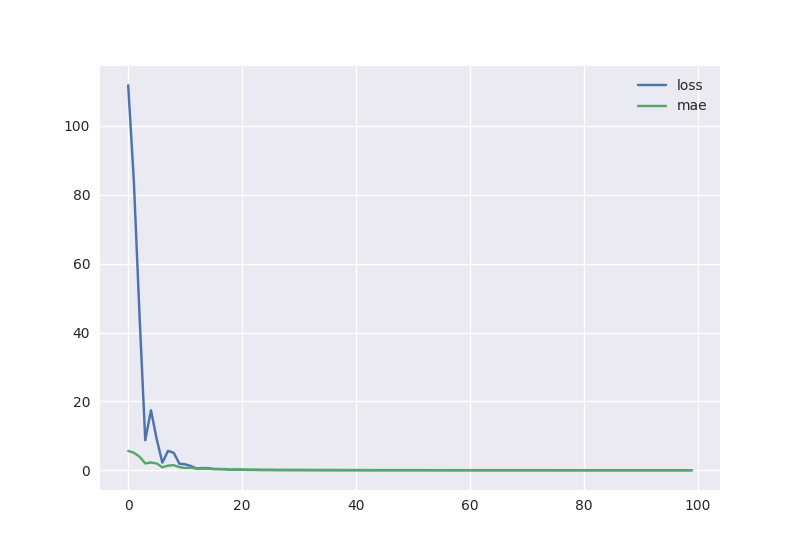

In [6]:
# Plotting metrics
pd.DataFrame(history_2.history).plot()

In [7]:
# Verifying the metrics
model_2.evaluate(X_test, y_test)

626/626 [==============================] - 1s 2ms/step - loss: 0.0027 - mae: 0.0185


[0.002666883170604706, 0.01845655031502247]

### Comparing the result of the model with the script

In [8]:
xs_true = pd.read_csv('xs_50.csv', header=None).T
tau_true = pd.read_csv('tau_50.csv', header=None).T
display(xs_true.tail())
display(tau_true.tail())

,0,1,2,3,4,5,6,7,8,9,10,11
19996,-0.24607,0.12751,1.243500e-09,0.003246,0.006272,-0.000001,1.2531,1.4861,3.0,0.012391,-0.006443,0.000002
19997,-0.24619,0.12727,1.221400e-09,0.003240,0.006275,-0.000001,1.2526,1.4864,3.0,0.012397,-0.006430,0.000002
19998,-0.24632,0.12703,1.199400e-09,0.003234,0.006279,-0.000001,1.2521,1.4866,3.0,0.012404,-0.006418,0.000002
19999,-0.24645,0.12678,1.177400e-09,0.003228,0.006282,-0.000001,1.2516,1.4869,3.0,0.012410,-0.006405,0.000002
20000,-0.24657,0.12654,1.155300e-09,0.003222,0.006285,-0.000001,1.2511,1.4871,3.0,0.012417,-0.006393,0.000002


,0,1,2,3
19996,21.584,-0.000052,0.000027,-8.446500e-07
19997,21.584,-0.000052,0.000027,-8.434700e-07
19998,21.584,-0.000052,0.000027,-8.422900e-07
19999,21.584,-0.000052,0.000027,-8.411000e-07
20000,21.584,-0.000052,0.000027,-8.399200e-07


In [9]:
xs_true_to_tensor = tf.constant(xs_true)
xs_true_to_tensor


<tf.Tensor: shape=(20001, 12), dtype=float64, numpy=
array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  5.0000e-01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  5.0000e-01],
       [ 0.0000e+00,  0.0000e+00,  6.6000e-03, ...,  0.0000e+00,
         0.0000e+00,  4.9998e-01],
       ...,
       [-2.4632e-01,  1.2703e-01,  1.1994e-09, ...,  1.2404e-02,
        -6.4179e-03,  1.7831e-06],
       [-2.4645e-01,  1.2678e-01,  1.1774e-09, ...,  1.2410e-02,
        -6.4053e-03,  1.7811e-06],
       [-2.4657e-01,  1.2654e-01,  1.1553e-09, ...,  1.2417e-02,
        -6.3927e-03,  1.7791e-06]])>

In [10]:
pred = model_2(tf.expand_dims(xs_true_to_tensor, axis=0))
print(pred)


tf.Tensor(
[[[ 2.6657413e+01 -2.1074779e-01  5.3172432e-02  1.3182777e-01]
  [ 2.6657413e+01 -2.1074779e-01  5.3172432e-02  1.3182777e-01]
  [ 2.6709904e+01 -2.0916517e-01  5.3434722e-02  1.2942713e-01]
  ...
  [ 2.1569351e+01  1.2301847e-02 -6.8840161e-03  1.2477092e-02]
  [ 2.1569313e+01  1.2302801e-02 -6.9171563e-03  1.2481622e-02]
  [ 2.1569324e+01  1.2302801e-02 -6.9471672e-03  1.2485914e-02]]], shape=(1, 20001, 4), dtype=float32)


In [11]:
pred_squeezed = tf.squeeze(pred)
print(pred_squeezed)


tf.Tensor(
[[ 2.6657413e+01 -2.1074779e-01  5.3172432e-02  1.3182777e-01]
 [ 2.6657413e+01 -2.1074779e-01  5.3172432e-02  1.3182777e-01]
 [ 2.6709904e+01 -2.0916517e-01  5.3434722e-02  1.2942713e-01]
 ...
 [ 2.1569351e+01  1.2301847e-02 -6.8840161e-03  1.2477092e-02]
 [ 2.1569313e+01  1.2302801e-02 -6.9171563e-03  1.2481622e-02]
 [ 2.1569324e+01  1.2302801e-02 -6.9471672e-03  1.2485914e-02]], shape=(20001, 4), dtype=float32)


In [12]:
pred_squeezed_pandas = pd.DataFrame(pred_squeezed)
display(pred_squeezed_pandas)

,0,1,2,3
0,26.657413,-0.210748,0.053172,0.131828
1,26.657413,-0.210748,0.053172,0.131828
2,26.709904,-0.209165,0.053435,0.129427
3,26.904699,-0.189055,0.054345,0.104917
4,27.097652,-0.168946,0.055246,0.080416
...,...,...,...,...
19996,21.569395,0.012303,-0.006822,0.012468
19997,21.569324,0.012303,-0.006853,0.012472
19998,21.569351,0.012302,-0.006884,0.012477
19999,21.569313,0.012303,-0.006917,0.012482


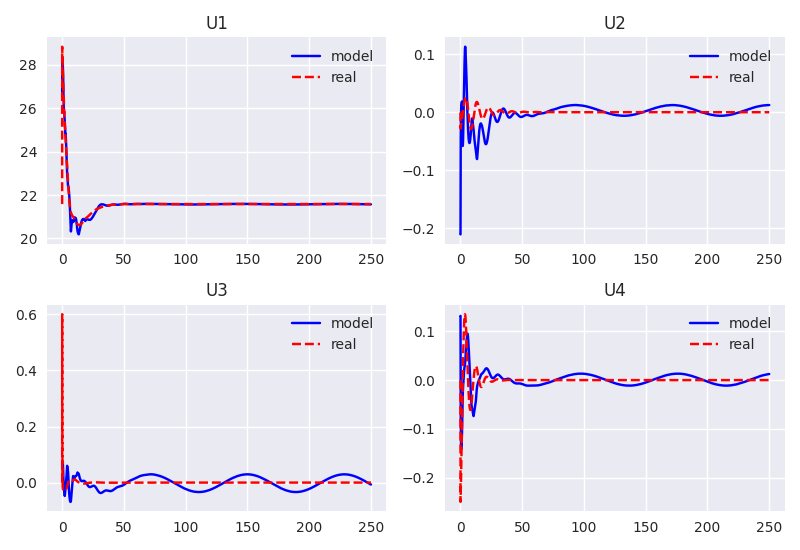

In [13]:
t = np.linspace(0,250,20001)
fig, ax = plt.subplots(2,2)


ax[0,0].plot(t, pred_squeezed_pandas[0], label='model', c='b')
ax[0,0].plot(t, tau_true[0], label='real', c='r', ls='--')
ax[0,0].set_title('U1')
ax[0,0].legend(loc='best')

ax[0,1].plot(t, pred_squeezed_pandas[1], label='model', c='b')
ax[0,1].plot(t, tau_true[1], label='real', c='r', ls='--')
ax[0,1].set_title('U2')
ax[0,1].legend(loc='best')

ax[1,0].plot(t, pred_squeezed_pandas[2], label='model', c='b')
ax[1,0].plot(t, tau_true[2], label='real', c='r', ls='--')
ax[1,0].set_title('U3')
ax[1,0].legend(loc='best')

ax[1,1].plot(t, pred_squeezed_pandas[3], label='model', c='b')
ax[1,1].plot(t, tau_true[3], label='real', c='r', ls='--')
ax[1,1].set_title('U4')
ax[1,1].legend(loc='best')

fig.tight_layout()

In [20]:
erro_0 = abs((pred_squeezed_pandas[0] - tau_true[0]) / tau_true[0])
erro_1 = abs((pred_squeezed_pandas[1] - tau_true[1]) / tau_true[1])
erro_2 = abs((pred_squeezed_pandas[2] - tau_true[2]) / tau_true[2])
erro_3 = abs((pred_squeezed_pandas[3] - tau_true[3]) / tau_true[3])

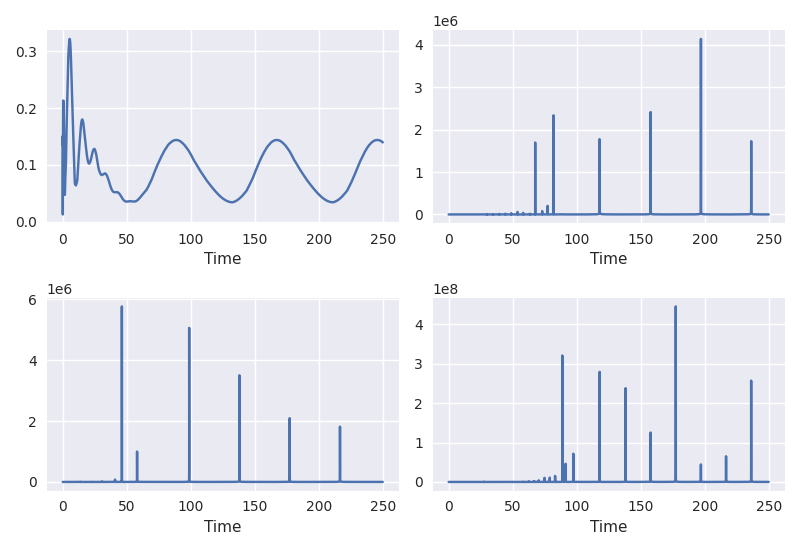

In [21]:
erro = [(erro_0, erro_1), (erro_2, erro_3)]
erro_label = [('erro_0', 'erro_1'), ('erro_2', 'erro_3')]
fig, ax = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        ax[i,j].plot(t, erro[i][j], label=erro_label[i][j])
        ax[i,j].set_xlabel('Time')
fig.tight_layout()

In [16]:
model_2.save('model_2.h5')